## Setting up the Magic

In [136]:
# We need to join the upper directory in order to access the local modules
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots  # noqa: F401
from scipy.stats import ecdf
import seaborn as sns

In [137]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
plt.rcParams["font.family"] = "Stix Two Text"
plt.rcParams["font.size"] = 15

In [142]:
ngnb = [4, 5, 10, 15, 20]
ws = [1, 64, 512]
ms = [2]

df = pd.DataFrame()
for gnb in ngnb:
    for w in ws:
        for m in ms:
            d = pd.read_csv(f'../benchmarks/results/gnb{gnb}_w{w}_{m}.csv', header=None)
            d['mu_sec'] = d[0] / 1000
            d['Window Size'] = w
            d['ngnb'] = gnb
            d['method'] = 'Non-Linear' if m == 2 else 'Linear'

            if df.empty:
                df = d
            else:
                df = pd.concat((df,d),ignore_index=True)

In [143]:
p = sns.color_palette("pastel")
p[0] = (0.973, 0.463, 0.427)
p[1] = (0.38, 0.612, 1)
p

[(0.973, 0.463, 0.427),
 (0.38, 0.612, 1),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

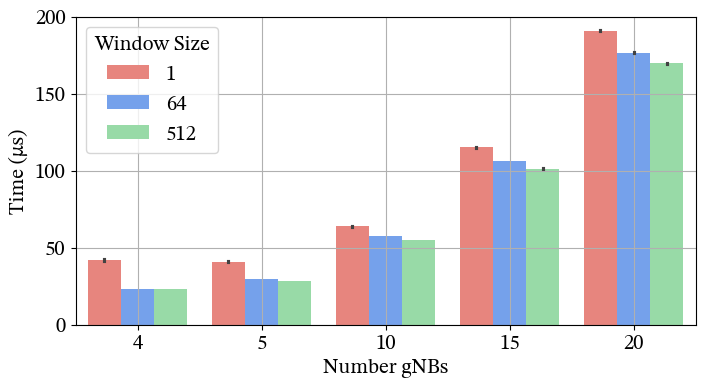

In [145]:
f, ax = plt.subplots(figsize=(8,4))

sns.barplot(df, x='ngnb', y='mu_sec', ax=ax, hue='Window Size', palette=p[:3])

ax.grid()
ax.legend(title='Window Size', frameon=True)

ax.set_xlabel('Number gNBs')
ax.set_ylabel('Time (µs)')
ax.set_ylim(0,200)

plt.savefig('../pics/comnets/timetopositionnonlinear.pdf', format="pdf", bbox_inches='tight', dpi=200)
plt.show()